# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer 
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import Normalizer
#sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")

%load_ext autoreload
%autoreload 2

,class,prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,
2CXO J004829.5-732959,HMXB,0.2900,0.1575,0.2300,0.2900,0.0150,0.0350,0.1125,0.1475,0.0125
2CXO J005449.0-725128,HMXB,0.4450,0.1000,0.1250,0.4450,0.0150,0.0575,0.0525,0.1850,0.0200
2CXO J010049.1-731526,HMXB,0.5450,0.0875,0.0925,0.5450,0.0275,0.0425,0.0500,0.1500,0.0050
2CXO J010049.8-731045,HMXB,0.3075,0.2025,0.0725,0.3075,0.0150,0.0450,0.1350,0.1400,0.0825
2CXO J010647.7-730940,HMXB,0.1750,0.1600,0.1100,0.1750,0.1125,0.1400,0.1575,0.1050,0.0400
...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,HMXB,0.3225,0.1925,0.0900,0.3225,0.0175,0.0250,0.0650,0.2675,0.0200
2CXO J220508.3-495935,HMXB,0.3000,0.0900,0.1725,0.3000,0.0225,0.0600,0.0500,0.2925,0.0125
2CXO J220544.0-495505,HMXB,0.2850,0.2575,0.0875,0.2850,0.0325,0.0625,0.0325,0.2275,0.0150


In [3]:
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

In [14]:

def plot_ridge(df):
    cl = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' , 'CV' ,'PULSAR']
    colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000' , 'r' , 'crimson']

    gs = grid_spec.GridSpec(len(cl),1)
    fig = plt.figure(figsize=(16,9))

    i = 0

    ax_objs = []
    for c in reversed(cl):
        #c = cl[i]
        x = np.array(df[df['class']==c]['prob'])
        x_d = np.linspace(0,1, 1000)

        kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
        kde.fit(x[:, None])

        logprob = kde.score_samples(x_d[:, None])

        # creating new axes object
        ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

        # plotting the distribution
        #ax_objs[-1].hist(x,color=colors[i],lw=1 , bins=20 , alpha = 0.6)
        ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
        ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=0.5,color=colors[i] ,)


        # setting uniform x and y lims
        #ax_objs[-1].set_xlim(0,1)
        #ax_objs[-1].set_ylim(0,2.5)

        # make background transparent
        rect = ax_objs[-1].patch
        rect.set_alpha(0)

        # remove borders, axis ticks, and labels
        ax_objs[-1].set_yticklabels([])

        if i == len(cl)-1:
            ax_objs[-1].set_xlabel("Test Score", fontsize=16,fontweight="bold")
        else:
            ax_objs[-1].set_xticklabels([])

        spines = ["top","right","left","bottom"]
        for s in spines:
            ax_objs[-1].spines[s].set_visible(False)

        adj_country = c.replace(" ","\n")
        ax_objs[-1].text(-0.02,0,adj_country,fontweight="bold",fontsize=14,ha="right")


        i += 1

    gs.update(hspace=-0.7)

    #fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)

    plt.tight_layout()
    plt.show()


/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


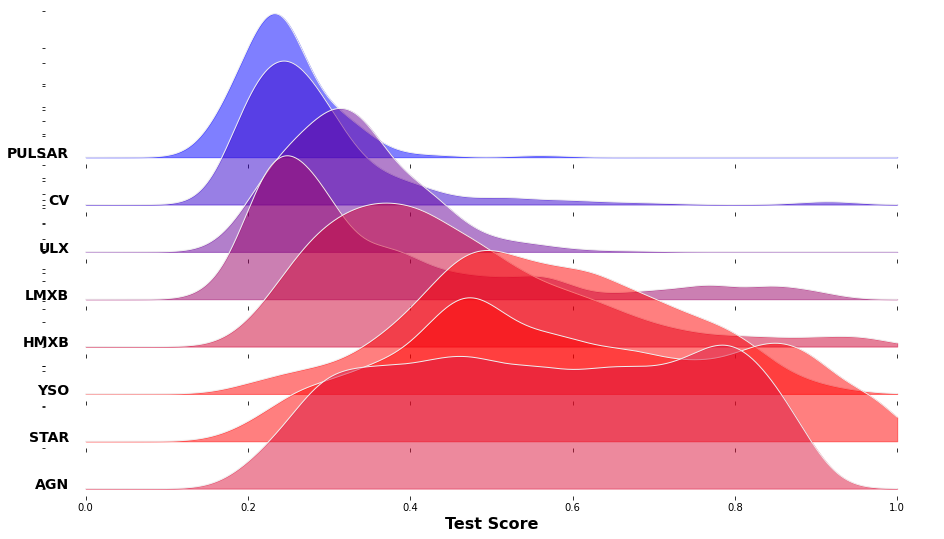

In [15]:
df = pd.read_csv('temp_res_comp/unid_prob/RF_10iter_rfimp.csv' ,index_col=0)
df.index.name='name'
plot_ridge(df)